<center>Basics of Data Analysis <br>
3SLO <br>
 </center>


---

#**📶Consumer Behavior and Shopping Habits**
> E-Commerce Transaction Trends:
#### Final project for **Python Data Analysis**📊📈 HAMK

<center>

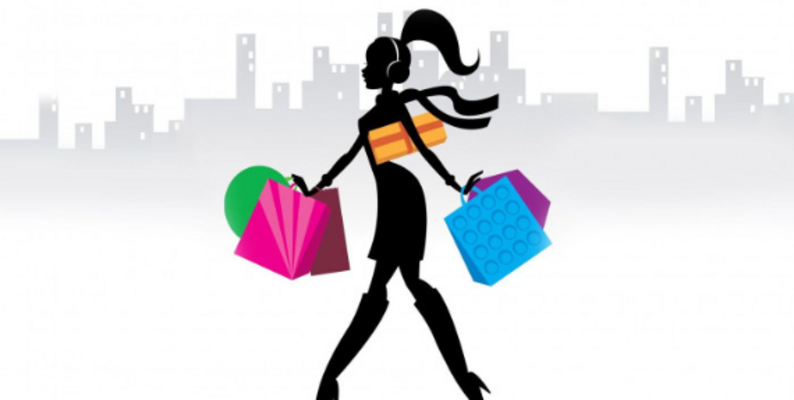

</center>
---

This dataset is from Kaggle and is used in this notebook for educational purposes. [Click here](<https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset>) to go to the original dataset.


Instructor: **Prof. Elina Kulmala**

By:  **Sofia Rots, Linda Marin, Olga Hakasuo, Sonja Lahti, and Sawsan Abdulbari**

## An In-Depth Exploratory Analysis

1. [**Introduction**](#1-introduction)
2. [Data Collection and Preparing](#2-data-preparing)

   2.1. [Importing Libraries](#21-importing-libraries)

   2.2 [Loading Data](#22-loading-data)

 2.3 [Fixing Dataset to **fit** work requirements](#23-fixing-dataset)

     >2.3.1. [Adding **Date** column to the orginal dataset](#231-add-date)
    
     >2.3.2. [Adding **Missing** Values](#232-add-missing-values)

     >2.3.3 [Adding **Duplicated** Values](#233-add-duplicated-values)

     >2.3.4. [Adding **Outlier**](#234-add-outlier)

3. [Data **Cleaning and Preprocessing**](#3-data-preprocessing)

   3.1. [Understanding the Data](#31-understanding-data)

   3.2. [Cleaning Data](#32-cleaning-data)
   >3.2.1. [Handling **Duplicated**](#321-handle-duplicated)

   >3.2.2 [Handling **Missing** Values](#322-handle-missing-values)
      - [Filling missing values in **Age** column using the Mean method](#filling-missing-values-in-age-column-using-the-mean-method)
      - [Filling missing values in **Gender** column using the Text method](#filling-missing-values-in-gender-column-using-the-text-method)
      - [Filling missing values in **Purchase Amount** (USD) column using the Mean method](#filling-missing-values-in-purchase-amount-column-using-the-mean-method)
      - [Filling missing values in **Location** column using the Mode method](#filling-missing-values-in-location-column-using-the-mode-method)
      - [Filling missing values in **Previous Purchases** using Interpolate method](#filling-missing-values-in-purchase-purchases-column-using-the-interpolate-method)
      - [Filling missing values in **Date** using forward fill method](#filling-missing-values-in-date-column-using-the-forward-fill-method)
      3.2.3. [Separate **Age** column into bins using **cut function**](#323-cut-function)

      >3.2.4. [Dealing with Outliers using **IQR** method](#324-handle-outlier)
      
      3.2. [**Data Objects & Attribute Types**](#33-data-objects)
4. [Exploratory Data Analysis **(EDA)**](#4-exploratory-data-analysis)

   4.1. [**Statistical** Analysis with **Visualizations**](#41-visualizations)
   
   [**Get to know the customers**](#get-to-know)
   - [**Top 5** customers](#top-5-customers)
   - [Which **gender and age** they are?](#which-gender-and-age)
   - [Where the **customers reside?**](#where-customers-reside)
   - [Are the **customers happy** with the **products**?](#are-customers-happy)
   - [What do the **customers buy**?](#customers-buy)
   - [**How much** do **they buy**?](#how-much-buy)
   - [ How often do the **customers use discounts** & what's **the effect**?](#customers-use-discounts)
   - [Is **promocode** being **used**? ](#promocode-used)
   - [Are the **customers subscribed**? ](#customers-subscribed)
   - [What **shipping types do they use**? ](#shipping-types-do-they-use)
   - [What is the **correlation** between **numerical columns**? ](#correlation-numerical-columns)
   - [**Overview** of **relationships** between the selected **variables**.](#Overview-relationships-columns)

   4.2. [**Statistical Summary:**](#42-summary)

   4.3. [**Time Series** Analysis](#43-time-series-analysis)
5. [**Insights and Recommandations**](#5-insights-recommandations)
6. [**Conclusion**](#6-conclusion)

## 1. **Introduction** <a name="1-introduction"></a>

**Context:**

  The Consumer Behavior and Shopping Habits Dataset provides comprehensive insights into consumers' preferences, tendencies, and patterns during their shopping experiences. This dataset encompasses a diverse range of variables, including demographic information, purchase history, product preferences, shopping frequency, and online/offline shopping behavior. With this rich collection of data, analysts and researchers can delve into the intricacies of consumer decision-making processes, aiding businesses in crafting targeted marketing strategies, optimizing product offerings, and enhancing overall customer satisfaction.



**Content:**
  The Consumer Behavior and Shopping Habits Dataset provides a detailed overview of consumer preferences and purchasing behaviors. It includes demographic information, purchase history, product preferences, and preferred shopping channels (online or offline). This dataset is essential for businesses aiming to tailor their strategies to meet customer needs and enhance their shopping experience, ultimately driving sales and loyalty.

## 2. Data **Collection** and **Preparing** <a name="2-data-preparing"></a>

### 2.1 Importing Libraries <a name="21-importing-libraries"></a>

In [99]:
import numpy as np # For statistical analysis
import pandas as pd # For data manipulation
import matplotlib.pyplot as plt # For visualization
import seaborn as sns # For more effective statistical visualization
%matplotlib inline
sns.set()
import plotly.express as px # For more effective visualization
import matplotlib.font_manager as fm # For a font to be used through out the notebook

In [100]:
# Loading the font
font_path = '/content/FRABK.TTF'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()

### 2.2 Loading Dataset <a name="22-loading-data"></a>

In [101]:
# Loading the dataset
shopping = pd.read_csv('/content/shopping_behavior_updated.csv')

In [102]:
shopping.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [103]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

### 2.3. **Fixing Dataset to fit work requirements** <a name="23-fixing-dataset"></a>

#### 2.3.1 Add Date column to the orginal dataset <a name="231-add-date"></a>


In [104]:
start_date = '2020-01-01'
end_date = '2022-12-31'
date_range = pd.date_range(start=start_date, end=end_date, periods=len(shopping))
shopping['Date'] = date_range

#### 2.3.2 Add Missing Values <a name="232-add-missing-values"></a>

In [105]:
np.random.seed(42) # A seed for reproducibility

# Introducing Missing Values
missing_percentage = 0.05  # The percentage of missing values

missing_values_columns =['Age','Purchase Amount (USD)', 'Previous Purchases','Gender' ,'Location']

for col in missing_values_columns:
    # Randomly selecting indices to introduce missing values
    missing_indices = np.random.choice(shopping.index, size=int(len(shopping) * missing_percentage), replace=False)
    shopping.loc[missing_indices, col] = np.nan

In [106]:
shopping.isna().sum()

Customer ID                 0
Age                       195
Gender                    195
Item Purchased              0
Category                    0
Purchase Amount (USD)     195
Location                  195
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases        195
Payment Method              0
Frequency of Purchases      0
Date                        0
dtype: int64

#### 2.3.3 Add Duplicated Values <a name="233-add-duplicated-values"></a>

In [107]:
# Duplicating 1% of the Rows
duplicate_percentage = 0.01  # The percentage of rows to be duplicated

# Randomly selecting 1% of the rows
duplicate_rows = shopping.sample(frac=duplicate_percentage, replace=True, random_state=42)

# Concatenating the original DataFrame with the duplicated rows
shopping = pd.concat([shopping, duplicate_rows], ignore_index=True)

In [108]:
shopping.duplicated().sum()

39

In [109]:
shopping.shape

(3939, 19)

#### 2.3.4 Add Outliers <a name="234-add-outlier"></a>

<Axes: >

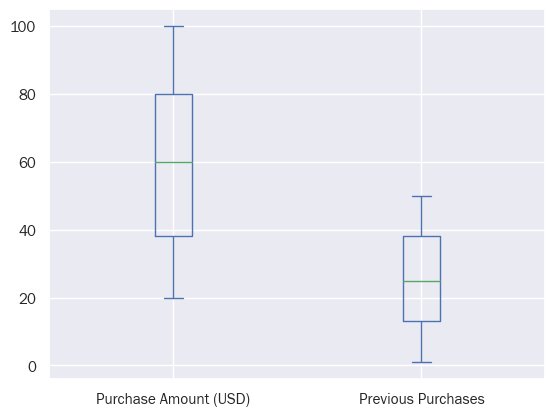

In [110]:
shopping[['Purchase Amount (USD)', 'Previous Purchases']].plot.box()

In [111]:
numerical_columns_outlier =['Purchase Amount (USD)', 'Previous Purchases']

# Introducing Outliers
outlier_percentage = 0.03  # The percentage of values to be replaced with outliers

for col in numerical_columns_outlier:
    # Randomly selecting indices to introduce outliers
    outlier_indices = np.random.choice(shopping.index, size=int(len(shopping) * outlier_percentage), replace=False)
    # Replacing selected values with outliers (multiply by a factor)
    shopping.loc[outlier_indices, col] *= 5

<Axes: >

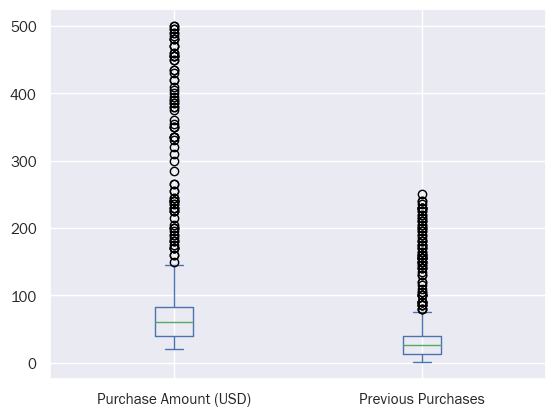

In [112]:
shopping[['Purchase Amount (USD)', 'Previous Purchases']].plot.box()

In [113]:
# Verify the DataFrame with missing values, outliers, and the date column
shopping.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Date
0,1,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14.0,Venmo,Fortnightly,2020-01-01 00:00:00.000000000
1,2,19.0,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2.0,Cash,Fortnightly,2020-01-01 06:44:24.683252115
2,3,50.0,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23.0,Credit Card,Weekly,2020-01-01 13:28:49.366504231
3,4,21.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49.0,PayPal,Weekly,2020-01-01 20:13:14.049756347
4,5,45.0,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,NaN,PayPal,Annually,2020-01-02 02:57:38.733008463


In [114]:
# shopping.to_csv("Shopping_V1.csv") //This is the modified dataset version with missing, added and edited data. You can save to csv file and use it if needed



---



## 3.Data **Cleaning** and **Preprocessing** <a name="3-data-preprocessing"></a>

### 3.1 **Understanding** the Data <a name="31-understanding-data"></a>

In [115]:
shopping.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Date'],
      dtype='object')

In [116]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3939 entries, 0 to 3938
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Customer ID             3939 non-null   int64         
 1   Age                     3744 non-null   float64       
 2   Gender                  3742 non-null   object        
 3   Item Purchased          3939 non-null   object        
 4   Category                3939 non-null   object        
 5   Purchase Amount (USD)   3744 non-null   float64       
 6   Location                3741 non-null   object        
 7   Size                    3939 non-null   object        
 8   Color                   3939 non-null   object        
 9   Season                  3939 non-null   object        
 10  Review Rating           3939 non-null   float64       
 11  Subscription Status     3939 non-null   object        
 12  Shipping Type           3939 non-null   object  

In [117]:
shopping.sample(4) # Getting random sample of the dataset

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Date
119,120,38.0,Male,Coat,Outerwear,76.0,Wyoming,M,Orange,Fall,4.3,Yes,Express,Yes,Yes,44.0,Cash,Annually,2020-02-03 10:04:57.307001795
2850,2851,57.0,Female,Sweater,Clothing,79.0,Nebraska,M,Silver,Spring,3.0,No,Store Pickup,No,No,36.0,Debit Card,Annually,2022-03-11 09:32:27.268530392
1093,1094,60.0,Male,Sneakers,Footwear,48.0,Delaware,S,Indigo,Winter,4.2,No,2-Day Shipping,Yes,Yes,46.0,Venmo,Every 3 Months,2020-11-02 23:01:38.794562708
3119,3120,63.0,Female,Sandals,Footwear,79.0,Louisiana,XL,Silver,Winter,4.7,No,2-Day Shipping,No,No,21.0,Credit Card,Every 3 Months,2022-05-25 22:39:07.063349568


In [118]:
shopping.describe().round(2).T # Statistical summary of the numerical columns

,count,mean,std,min,25%,50%,75%,max
Customer ID,3939.0,1951.11,1126.19,1.0,976.5,1951.0,2926.5,3900.0
Age,3744.0,44.04,15.21,18.0,31.0,44.0,57.0,70.0
Purchase Amount (USD),3744.0,66.33,50.14,20.0,39.0,61.0,82.0,500.0
Review Rating,3939.0,3.75,0.71,2.5,3.1,3.8,4.4,5.0
Previous Purchases,3738.0,28.37,25.66,1.0,13.0,26.0,39.0,250.0




---



### 3.2 **Cleaning** Data <a name="32-cleaning-data"></a>

#### 3.2.1 Handle **Duplicated** Values <a name="321-handle-duplicated"></a>

In [119]:
shopping.duplicated().sum() # Looking for any duplicated values

33

In [120]:
shopping = shopping.drop_duplicates(subset=['Customer ID'], keep='first') # Drop duplicated values

In [121]:
shopping.shape # Verify shape of the dataset after dropped values

(3900, 19)



---



#### 3.2.2 Handle **Missing** Values <a name="322-handle-missing-values"></a>

In [122]:
shopping.isna().mean() * 100  #Checking if the dataset contains any missing values and getting the percentage of the missing data

Customer ID               0.0
Age                       5.0
Gender                    5.0
Item Purchased            0.0
Category                  0.0
Purchase Amount (USD)     5.0
Location                  5.0
Size                      0.0
Color                     0.0
Season                    0.0
Review Rating             0.0
Subscription Status       0.0
Shipping Type             0.0
Discount Applied          0.0
Promo Code Used           0.0
Previous Purchases        5.0
Payment Method            0.0
Frequency of Purchases    0.0
Date                      0.0
dtype: float64

<Axes: >

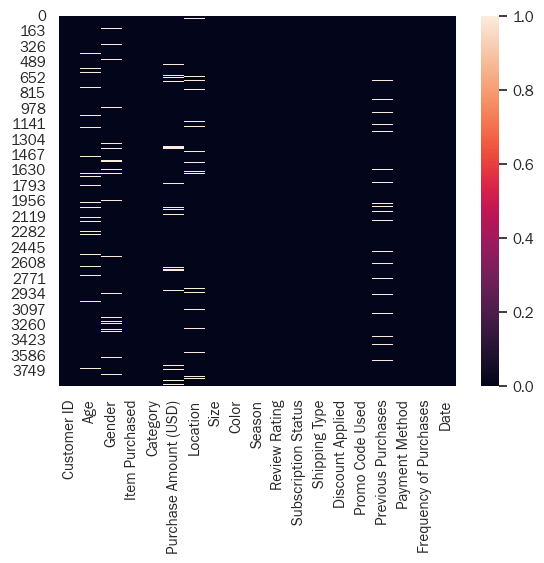

In [123]:
sns.heatmap(shopping.isna()) # Visualizing it to see where exactly the missing data is

##### - Filling missing values in **Age** column using the **Mean** method <a name="filling-missing-values-in-age-column-using-the-mean-method"></a>

In [124]:
shopping['Age'].fillna(shopping['Age'].mean(), inplace= True)

##### - Filling missing values in **Gender** column using **Text** (NOT SPECIFIED) <a name="filling-missing-values-in-gender-column-using-the-text-method"></a>


In [125]:
shopping['Gender'].fillna('Not Specified', inplace=True)

##### - Filling missing values in **Purchase Amount (USD)** using the **Mean** method <a name="filling-missing-values-in-purchase-amount-column-using-the-mean-method"></a>

In [126]:
shopping['Purchase Amount (USD)'].fillna(shopping['Purchase Amount (USD)'].mean(), inplace=True)

##### - Filling missing values in **Location** using **Mode** method <a name="filling-missing-values-in-location-column-using-the-mode-method"></a>

In [127]:
shopping['Location'].fillna(shopping['Location'].mode()[0], inplace=True)

##### - Filling missing values in **Previous Purchases** using **Interpolate** method <a name="filling-missing-values-in-purchase-purchases-column-using-the-interpolate-method"></a>

In [128]:
shopping['Previous Purchases'].interpolate(method='linear', inplace=True)

##### - Filling missing values in Date using  **Forward Fill** method <a name="filling-missing-values-in-date-column-using-the-forward-fill-method"></a>

In [129]:
shopping['Date'].fillna(method='ffill', inplace=True)

In [130]:
shopping.isna().any() # Verifying that dataset is now cleand from the missing values

Customer ID               False
Age                       False
Gender                    False
Item Purchased            False
Category                  False
Purchase Amount (USD)     False
Location                  False
Size                      False
Color                     False
Season                    False
Review Rating             False
Subscription Status       False
Shipping Type             False
Discount Applied          False
Promo Code Used           False
Previous Purchases        False
Payment Method            False
Frequency of Purchases    False
Date                      False
dtype: bool

<Axes: >

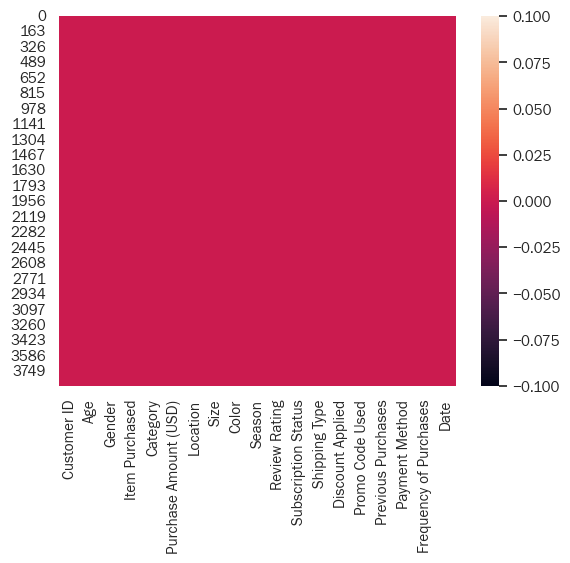

In [131]:
sns.heatmap(shopping.isna()) # Verifying that dataset is now cleand from the missing values



---



#### 3.2.3 Separate **Age** column into bins using **cut function** <a name="323-cut-function"></a>

In [132]:
#
columns_to_select = ['Age']
age_bins = shopping[columns_to_select].copy()

bins = [18,30,40,50,60,70]

labels = ['YoungAdult', 'Adult', 'MiddleAged', 'Elderly', 'Retired']

age_bins['AgeGroup'] = pd.cut(age_bins['Age'], bins=bins, labels=labels, right=False)

categories_list = age_bins['AgeGroup'].cat.categories.tolist()
print(f"Bin Names: {categories_list}\n")

bin_counts = age_bins['AgeGroup'].value_counts()
print(f"Bin Counts:\n{bin_counts}")

Bin Names: ['YoungAdult', 'Adult', 'MiddleAged', 'Elderly', 'Retired']

Bin Counts:
MiddleAged    890
YoungAdult    839
Elderly       738
Adult         688
Retired       684
Name: AgeGroup, dtype: int64




---



### 3.2.4 Dealing with **Outliers** using **IQR** method <a name="324-handle-outlier"></a>

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

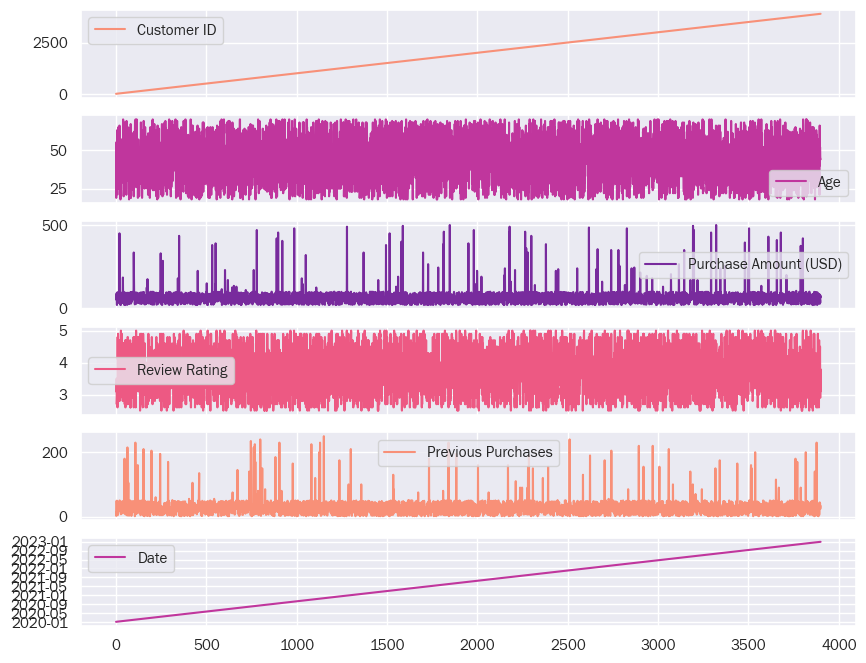

In [133]:
# Identify the outliers in the dataset
shopping.plot(subplots=True, figsize=(10, 8), color=['#f89078', '#c0369d','#782b9d','#ed5983' ])

In [134]:
outliers_col=['Purchase Amount (USD)', 'Previous Purchases']

In [135]:
def handle_outliers_iqr(data, column_name, threshold=1.5):
    """
    Handle outliers in a DataFrame column using the IQR method.

    Parameters:
    - data: DataFrame
    - column_name: str, the column containing the data
    - threshold: float, the threshold for identifying outliers

    Returns:
    - DataFrame with outliers handled
    """
    # Plot the original data
    plt.figure(figsize=(10, 6))
    plt.hist(data[column_name], bins=30, color='#782b9d', alpha=0.7)
    plt.title(f'Original {column_name}', font='Franklin Gothic Book', fontsize= 16)
    plt.show()

    # Calculate the IQR (Interquartile Range)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    min_out = Q1 - threshold * IQR
    max_out = Q3 + threshold * IQR

    # Identify and handle outliers
    outliers_mask = (data[column_name] < min_out) | (data[column_name] > max_out)
    non_outlier_values = data.loc[~outliers_mask, column_name]
    median_value = non_outlier_values.median()

    # Replace outliers with the median
    data[f'IQR_{column_name}'] = data[column_name].mask(outliers_mask, median_value)

    # Plot the data after handling outliers using IQR
    plt.figure(figsize=(10, 6))
    plt.hist(data[f'IQR_{column_name}'], bins=30, color='#ed5983', alpha=0.7)
    plt.title(f'{column_name} after IQR Handling', font='Franklin Gothic Book', fontsize= 16)
    plt.show()

    # Drop the original column
    data.drop(column_name, axis=1, inplace=True)
    return data

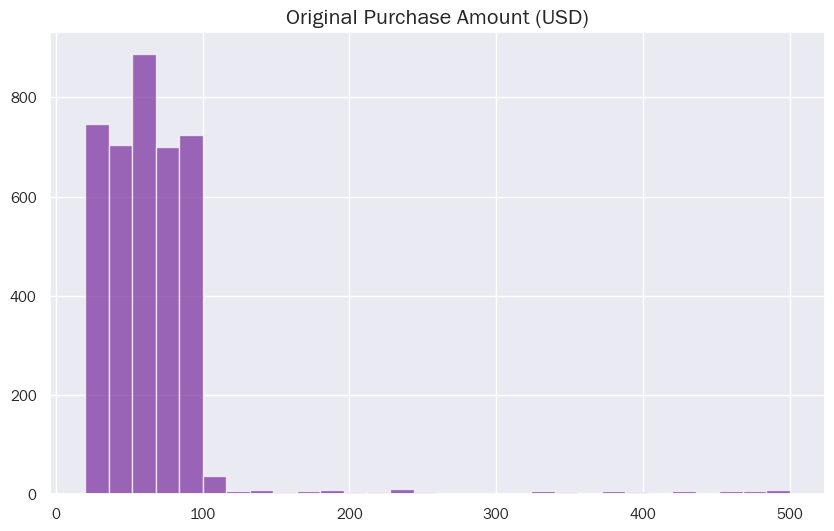

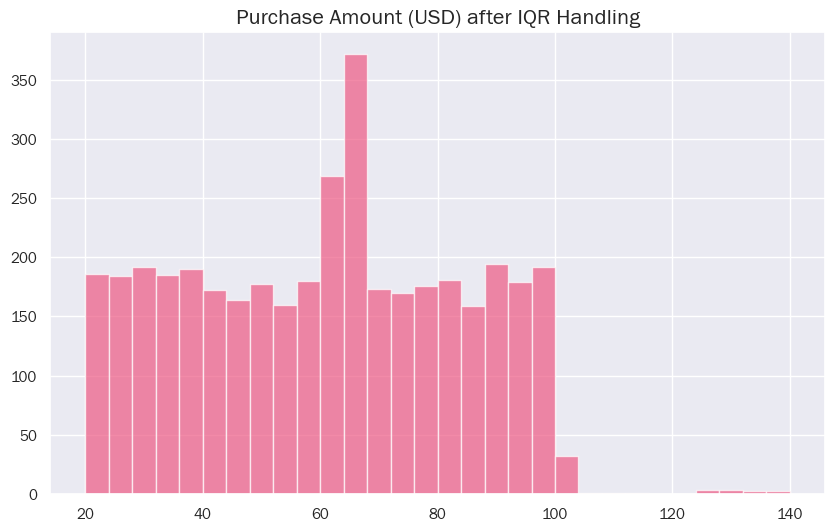

In [136]:
# Using Handle outliers function with Purchase Amount (USD)
shopping = handle_outliers_iqr(shopping, 'Purchase Amount (USD)')

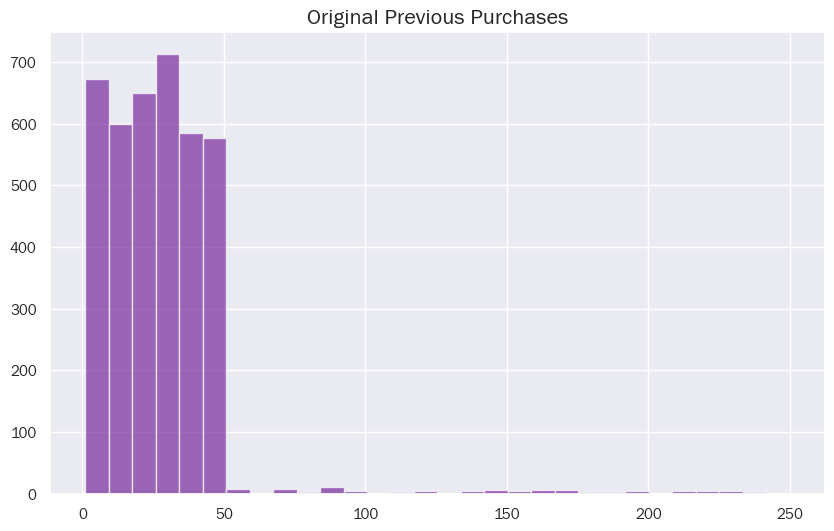

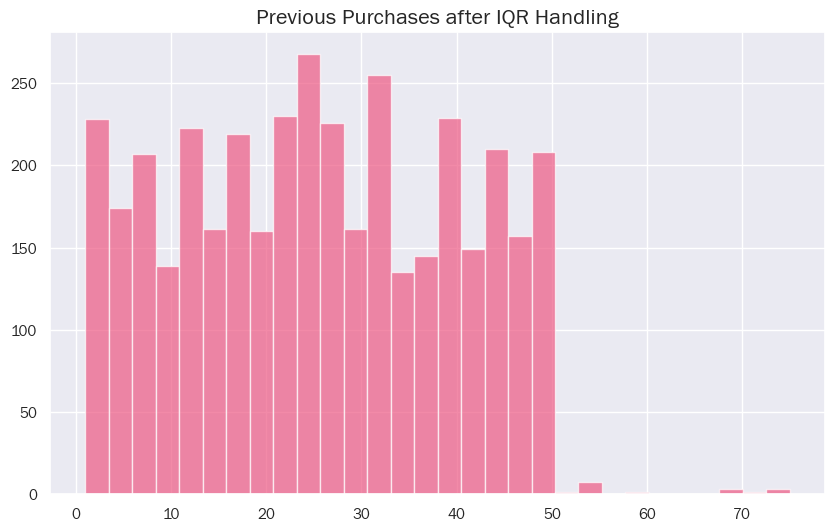

In [137]:
# Using Handle outliers function with Previous Purchases
shopping = handle_outliers_iqr(shopping, 'Previous Purchases')

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

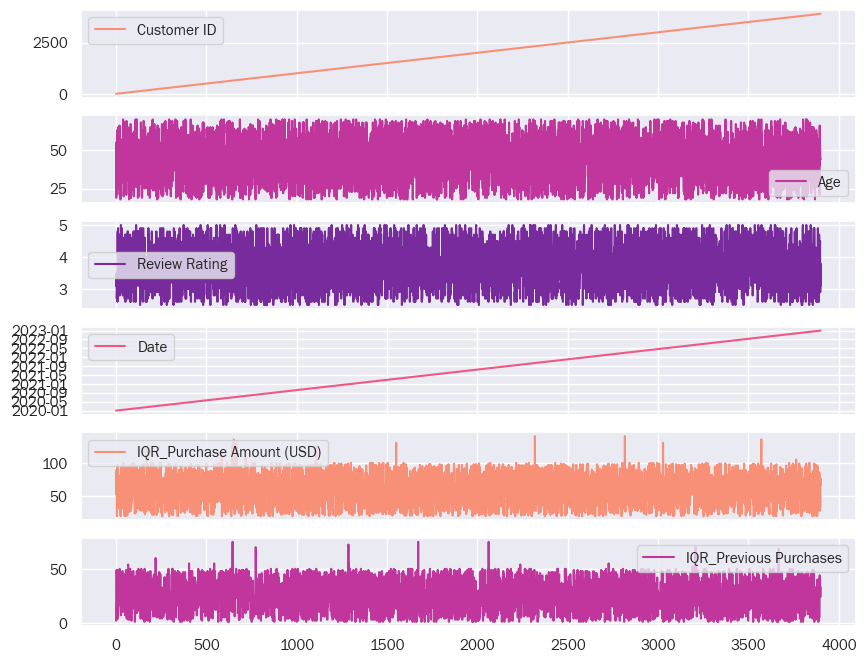

In [138]:
#Verify that outliers are handled
shopping.plot(subplots=True, figsize=(10, 8), color=['#f89078', '#c0369d','#782b9d','#ed5983' ])

In [139]:
# shopping.to_csv("Shopping_V1.csv")
#This is the modified dataset version with missing, added and edited data. You can save to csv file and use it if needed to use it fpr the dashboard



---



### 3.3 **Data Objects & Attribute Types** <a name="33-data-objects"></a>

In [140]:
Nominal_Attributes ="Nominal Attributes: Item purchased, Category, location, Size, Color, Season, Shipping type, payment method, frequency of purchase."
print(Nominal_Attributes)

Nominal Attributes: Item purchased, Category, location, Size, Color, Season, Shipping type, payment method, frequency of purchase.


In [141]:
Binary_Columns="Binary Columns: Gender, Subscription status, Discount applied, Promo code used."
print(Binary_Columns)

Binary Columns: Gender, Subscription status, Discount applied, Promo code used.


In [142]:
Ordinal_Attributes = "Ordinal Attributes: Customer ID, Age, Purchase amount, Size, Review Rating, Previous Purchase, Date"
print(Ordinal_Attributes)

Ordinal Attributes: Customer ID, Age, Purchase amount, Size, Review Rating, Previous Purchase, Date


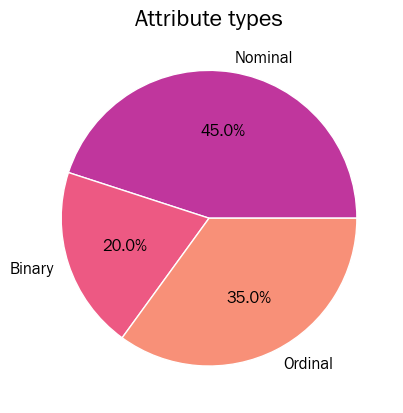

In [143]:
O = 7
B = 4
N = 9

labels = 'Nominal', 'Binary', 'Ordinal'
sizes = [N, B, O]
colors = ['#c0369d', '#ed5983', '#f89078']

font_title = {'font':'Franklin Gothic Book',
              'fontsize': 17.5, 'fontweight': 'bold', 'color': 'black'}
font_labels = {'font':'Franklin Gothic Book',
               'fontsize': 12, 'fontweight': 'bold', 'color': 'black'}
font_autopct = {'font':'Franklin Gothic Book',
                'fontsize': 10, 'fontweight': 'bold', 'color': 'black'}
plt.pie(sizes,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        textprops=font_labels)

plt.title('Attribute types', fontdict=font_title)

plt.show()



---



## 4. **Exploratory Data Analysis** <a name="4-exploratory-data-analysis"></a>

### 4.1 **Statistical** Analysis with **Visualizations** <a name="41-visualizations"></a>



#### - **Get to know the customers** <a name="get-to-know"></a>

#### - **Top 5** customers <a name="top-5-customers"></a>

In [144]:
customer_data = pd.DataFrame(shopping)

# Calculate a combined score based on Purchase Amount and Previous Purchases
customer_data['Combined Score'] = customer_data['IQR_Purchase Amount (USD)'] + customer_data['IQR_Previous Purchases']

# Find the customer with the highest combined score
best_customers = customer_data.nlargest(5, 'Combined Score')

print("Top 5 Customers:\n")
for idx, row in best_customers.iterrows():
    print(f"Gender: {row['Gender']}")
    print(f"Age: {int(round(row['Age'], 0))}")
    print(f"Purchase Amount (USD): {row['IQR_Purchase Amount (USD)']}")
    print(f"Previous Purchases: {row['IQR_Previous Purchases']}")
    print("-" * 20)  # Separator for readability

Top 5 Customers:

Gender: Female
Age: 43
Purchase Amount (USD): 140.0
Previous Purchases: 45.0
--------------------
Gender: Female
Age: 52
Purchase Amount (USD): 130.0
Previous Purchases: 47.0
--------------------
Gender: Not Specified
Age: 44
Purchase Amount (USD): 125.0
Previous Purchases: 50.0
--------------------
Gender: Male
Age: 52
Purchase Amount (USD): 125.0
Previous Purchases: 46.0
--------------------
Gender: Male
Age: 44
Purchase Amount (USD): 130.0
Previous Purchases: 40.0
--------------------




---



#### - Which **gender** and **age** are they? <a name="which-gender-and-age"></a>

In [145]:
sum_genders = shopping['Gender'].values
sum_of_men = np.sum(sum_genders == 'Male')
sum_of_women = np.sum(sum_genders == 'Female')
sum_of_ns = np.sum(sum_genders == 'Not Specified')
print(f'Sum of men: {sum_of_men}\nSum of women: {sum_of_women}\nSum of not specified: {sum_of_ns}')

Sum of men: 2519
Sum of women: 1186
Sum of not specified: 195


In [146]:
gender_counts = shopping['Gender'].value_counts()

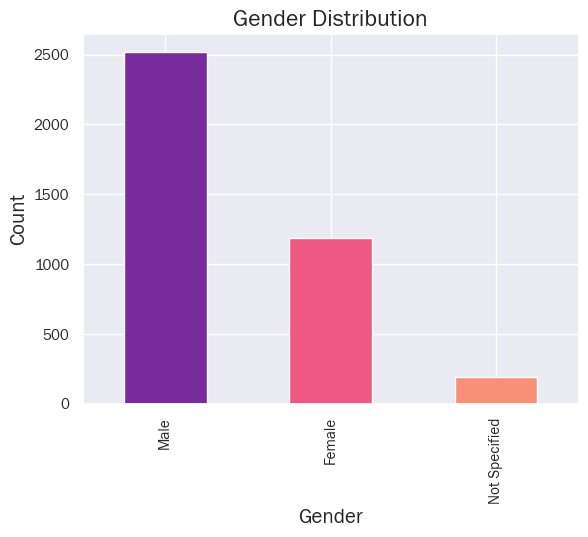

In [147]:
# Plotting a bar chart
gender_counts.plot(kind='bar',
                   color=['#782b9d', '#ed5983', '#f89078'])
plt.title('Gender Distribution',
          font='Franklin Gothic Book', fontsize= 17)
plt.xlabel('Gender',
           font='Franklin Gothic Book', fontsize= 15)
plt.ylabel('Count',
           font='Franklin Gothic Book', fontsize= 15)
plt.show()

In [148]:
# Filter male customers
male_cust = shopping[shopping['Gender'] == 'Male'];

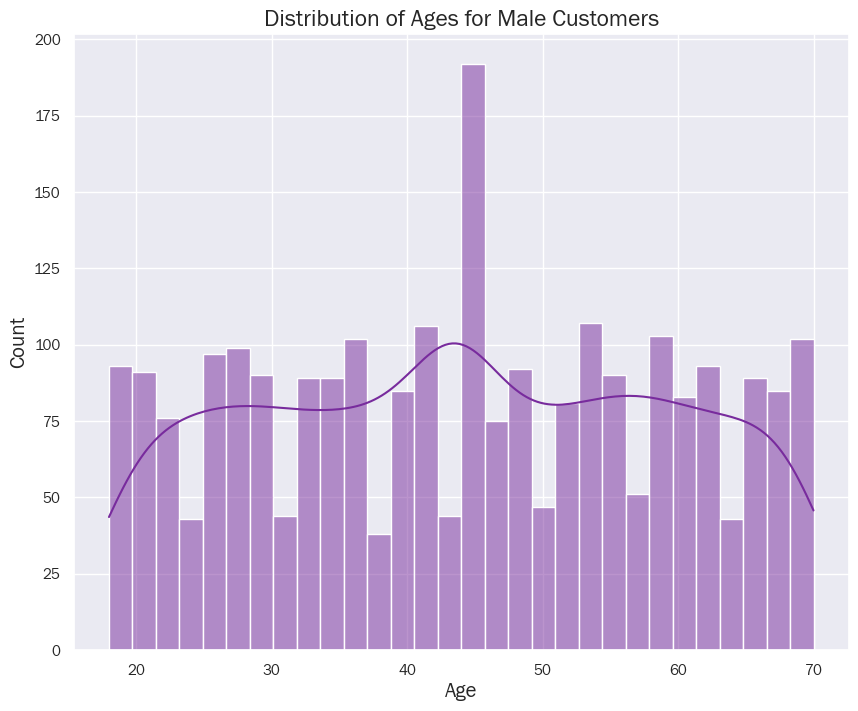

In [149]:
# Sort the DataFrame by age
male_cust_sorted = male_cust.sort_values(by='Age')

# Plot the histogram
plt.figure(figsize=(10, 8))
sns.histplot(data=male_cust_sorted,
             x='Age',bins=30,
             color='#782b9d',
             kde=True)
plt.title('Distribution of Ages for Male Customers',
          font='Franklin Gothic Book', fontsize= 17)
plt.xlabel('Age', font='Franklin Gothic Book', fontsize= 15)
plt.ylabel('Count', font='Franklin Gothic Book', fontsize= 15)
plt.show()

In [150]:
# Filter female customers
female_cust = shopping[shopping['Gender'] == 'Female'];

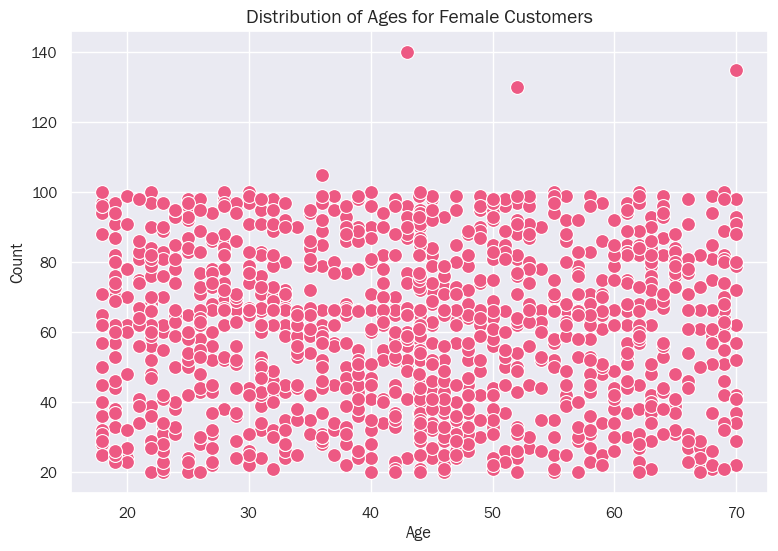

In [151]:
female_cust_sorted = female_cust.sort_values(by='Age')

# Scatter plot
plt.figure(figsize=(9, 6))
sns.scatterplot(data=female_cust,
                x='Age',
                y='IQR_Purchase Amount (USD)',
                color='#ed5983',
                s=100,
                marker='o')
plt.title('Distribution of Ages for Female Customers',
          fontdict={'fontname': 'Franklin Gothic Book', 'fontsize': 14})
plt.xlabel('Age', fontdict={'fontname': 'Franklin Gothic Book', 'fontsize': 12})
plt.ylabel('Count', fontdict={'fontname': 'Franklin Gothic Book', 'fontsize': 12})
plt.show()



---



#### - Where the **customers reside?** <a name="where-customers-reside"></a>


In [152]:
location_counts = shopping['Location'].value_counts()

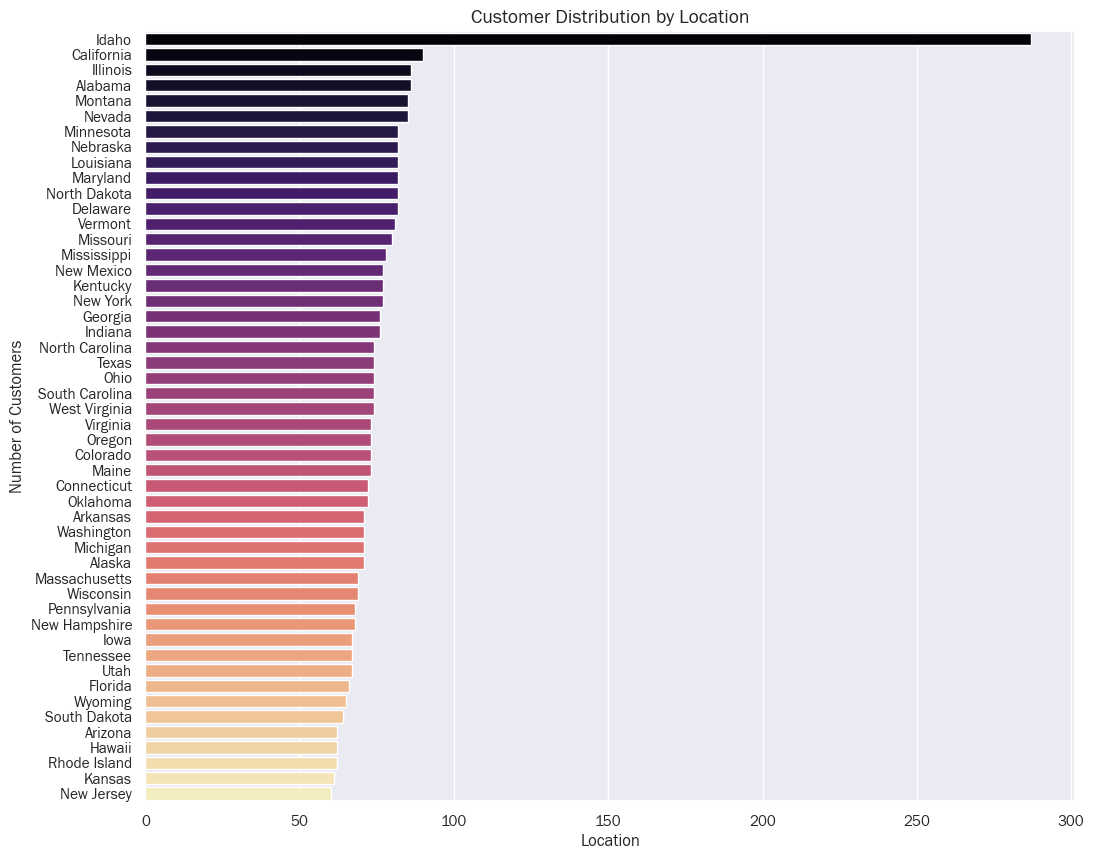

In [153]:
# Sort the values for better visualization
location_counts_sorted = location_counts.sort_values(ascending=False)

# The bar chart
plt.figure(figsize=(12, 10))
ax = sns.barplot(x=location_counts_sorted.values,
                 y=location_counts_sorted.index,
                 palette='magma')

# Title and labels
plt.title("Customer Distribution by Location",
          font='Franklin Gothic Book', fontsize= 14)
plt.xlabel("Location",
           font='Franklin Gothic Book', fontsize= 12)
plt.ylabel("Number of Customers",
           font='Franklin Gothic Book', fontsize= 12)

plt.show()



---



#### - Are the **customers happy** with the **products**? <a name="are-customers-happy"></a>

In [154]:
max_sales = np.max(shopping['Review Rating'])
min_sales = np.min(shopping['Review Rating'])
median_sales = np.median(shopping['Review Rating'])
mean_sales = np.mean(shopping['Review Rating'])
std_sales = np.std(shopping['Review Rating'])

print("Review Rating summary:")
print("-" * 22)
print(f"Maximum: {max_sales}")
print(f"Minimum: {min_sales}")
print(f"Median: {median_sales}")
print(f"Mean: {(mean_sales):.1f}")
print(f"Standard Deviation: {(std_sales):.1f}")

Review Rating summary:
----------------------
Maximum: 5.0
Minimum: 2.5
Median: 3.7
Mean: 3.7
Standard Deviation: 0.7


In [155]:
import matplotlib.colors as mcolors

<ipython-input-156-a48aa8c784a3>:18: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



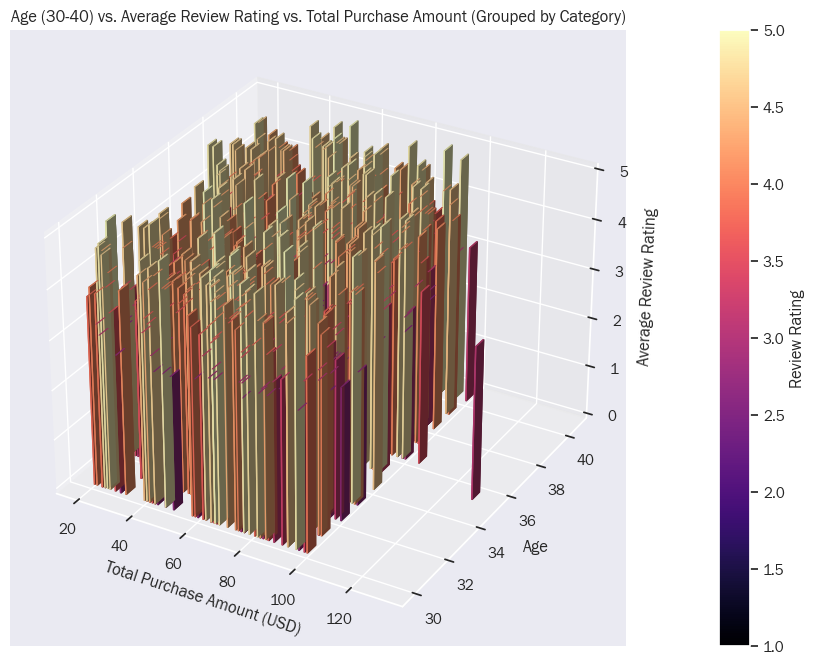

In [156]:
# Selected age between 30 and 40
selected_age_group = shopping[(shopping['Age'] >= 30) & (shopping['Age'] <= 40)]

# Create a 3D bar chart
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define data for the bar chart
x = selected_age_group['IQR_Purchase Amount (USD)']
y = selected_age_group['Age']
z = np.zeros_like(x)
dx = dy = 0.5
dz = selected_age_group['Review Rating']

# Created a custom color mapping based on 'Review Rating'
colors = mcolors.Normalize(vmin=1, vmax=5)
colormap = plt.cm.ScalarMappable(norm=colors,
                                 cmap=plt.cm.get_cmap('magma'))

# Created the 3D bars with custom colors based on 'Review Rating'
bars = ax.bar3d(x, y, z, dx, dy, dz,
                color=colormap.to_rgba(dz),
                edgecolor='none',
                shade=True)

# Added a colorbar
cbar = fig.colorbar(colormap,
                    ax=ax,
                    pad=0.1)
cbar.set_label('Review Rating')

# Added labels and title
ax.set_xlabel('Total Purchase Amount (USD)')
ax.set_ylabel('Age')
ax.set_zlabel('Average Review Rating')
ax.set_title('Age (30-40) vs. Average Review Rating vs. Total Purchase Amount (Grouped by Category)')
plt.show()



---



#### - What do the **customers buy**? <a name="customers-buy"></a>

Top 5 Best-Selling Products:
Product: Shirt  |  10506.16 $
Product: Blouse  |  10361.3 $
Product: Dress  |  10245.73 $
Product: Pants  |  10203.3 $
Product: Jewelry  |  9947.73 $




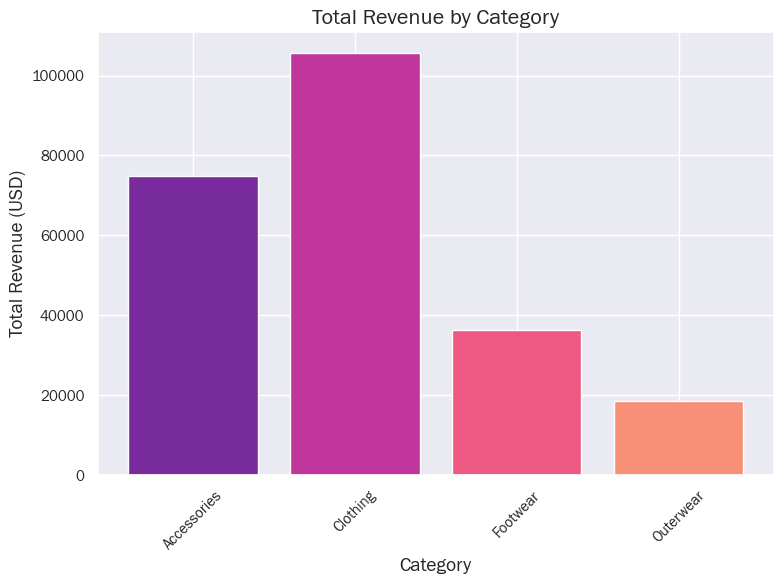

In [157]:
top_5 = pd.DataFrame(shopping)

# Group by 'Item Purchased' and sum the 'Purchase Amount (USD)' for each product
product_sales = top_5.groupby('Item Purchased')['IQR_Purchase Amount (USD)'].sum().reset_index()

# Find the top 5 best-selling products
top_5_products = product_sales.nlargest(5, 'IQR_Purchase Amount (USD)')

# Group by 'Category' and calculate the total revenue for each category
category_revenue = top_5.groupby('Category')['IQR_Purchase Amount (USD)'].sum().reset_index()

# Visualize total revenue amounts by category
plt.figure(figsize=(8, 6))
plt.bar(category_revenue['Category'],
        category_revenue['IQR_Purchase Amount (USD)'],
        color=['#782b9d', '#c0369d', '#ed5983', '#f89078'])
plt.xlabel('Category',
           font='Franklin Gothic Book',
           fontsize= 14)
plt.ylabel('Total Revenue (USD)',
           font='Franklin Gothic Book', fontsize= 14)
plt.title('Total Revenue by Category',
          font='Franklin Gothic Book', fontsize= 16)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the top 5 best-selling products
print("Top 5 Best-Selling Products:")
for idx, row in top_5_products.iterrows():
    print(f"Product: {row['Item Purchased']}  |  {round(row['IQR_Purchase Amount (USD)'], 2)} $")

print("\n")
plt.show()



---



#### - **How much** do **they buy**? <a name="how-much-buy"></a>

In [158]:
gender = shopping.groupby('Gender')['IQR_Purchase Amount (USD)'].sum();

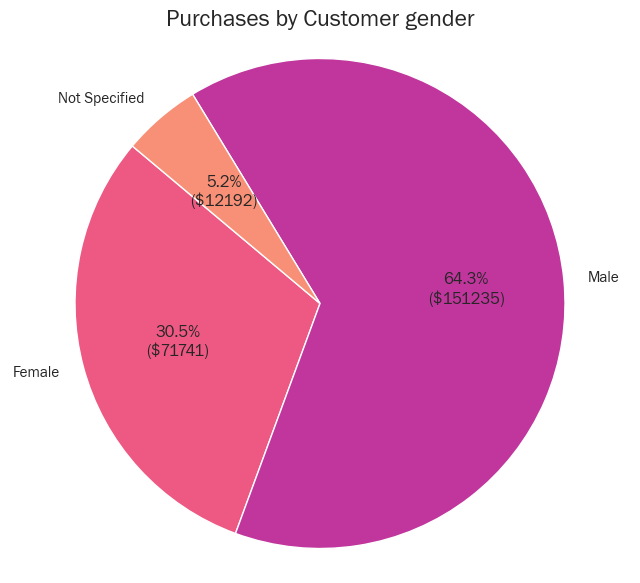

In [159]:
# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 7))
labels = ['Female', 'Male', 'Not Specified']
ax.pie(gender,
       autopct=lambda pct: f'{pct:.1f}%\n(${(pct/100*sum(gender)):.0f})',
       startangle=140,
       colors=['#ed5983', '#c0369d', '#f89078'],
       labels=labels)
ax.set_title("Purchases by Customer gender", font='Franklin Gothic Book', fontsize= 17)
plt.axis('equal')  # Equal aspect ratio ensures that the chart is drawn as a circle.

plt.show()

In [160]:
result=shopping.groupby("Location")["IQR_Purchase Amount (USD)"].agg(["mean", "median"]).round(2);

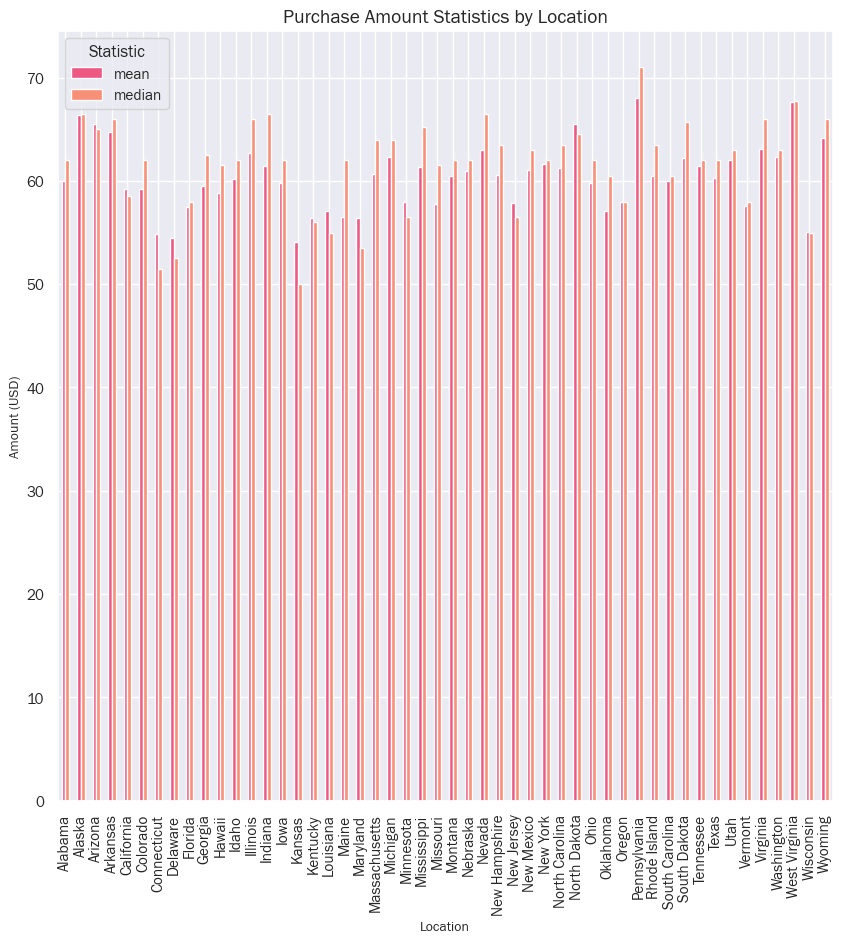

In [161]:
result.plot(kind='bar',
            figsize=(10, 10),
            color=['#ed5983','#f89078'])
plt.title('Purchase Amount Statistics by Location',
          font='Franklin Gothic Book',
          fontsize= 14)
plt.xlabel('Location',
           font='Franklin Gothic Book',
           fontsize= 10)
plt.ylabel('Amount (USD)',
           font='Franklin Gothic Book',
           fontsize= 10)
plt.legend(title='Statistic')
plt.show()



---



#### - How often do the **customers use discounts** & what's **the effect**? <a name="customers-use-discounts"></a>

In [162]:
#Count of Discounts
discount_counts = shopping['Discount Applied'].value_counts();

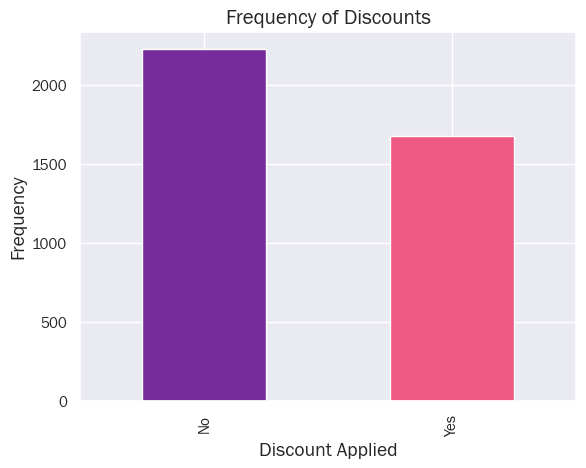

In [163]:
discount_counts.plot(kind='bar',
                     title='Frequency of Discounts',
                     color=['#782b9d', '#ed5983'])
plt.xlabel('Discount Applied',
           font='Franklin Gothic Book',
           fontsize=14)
plt.ylabel('Frequency',
           font='Franklin Gothic Book',
           fontsize=14)
plt.title('Frequency of Discounts',
          font='Franklin Gothic Book', fontsize=15)
plt.show()

In [164]:
# Average Purchase Amount with and without Discounts
avg_purchase_with_discount = shopping[shopping['Discount Applied'] == 'Yes']['IQR_Purchase Amount (USD)'].mean().round(2)
avg_purchase_without_discount = shopping[shopping['Discount Applied'] == 'No']['IQR_Purchase Amount (USD)'].mean().round(2)

print(f'Average Purchase Amount with discount : {avg_purchase_with_discount}')
print(f'Average Purchase Amount with out discount : {avg_purchase_without_discount}')

Average Purchase Amount with discount : 60.11
Average Purchase Amount with out discount : 60.44




---



#### - Is **promocode** being **used**? <a name="promocode-used"></a>

In [165]:
promo_counts = shopping['Promo Code Used'].value_counts();promo_counts

No     2223
Yes    1677
Name: Promo Code Used, dtype: int64

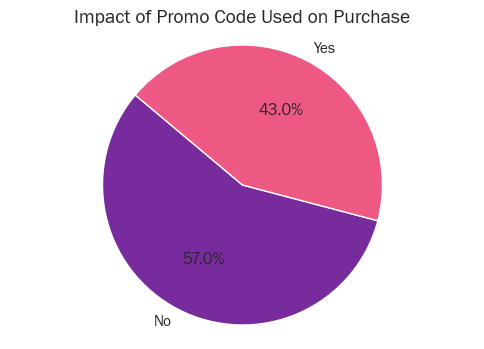

In [166]:
# The pie chart
plt.figure(figsize=(6, 4))
plt.pie(promo_counts,
        labels=promo_counts.index,
        autopct='%1.1f%%', # For percentage
        startangle=140,
        colors=['#782b9d', '#ed5983'])
plt.title("Impact of Promo Code Used on Purchase",
          fontname='Franklin Gothic Book',
          fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



---



#### - Are the **customers subscribed**? <a name="customers-subscribed"></a>

In [167]:
gender_subscription = shopping.groupby('Subscription Status')['Gender'].value_counts().unstack()

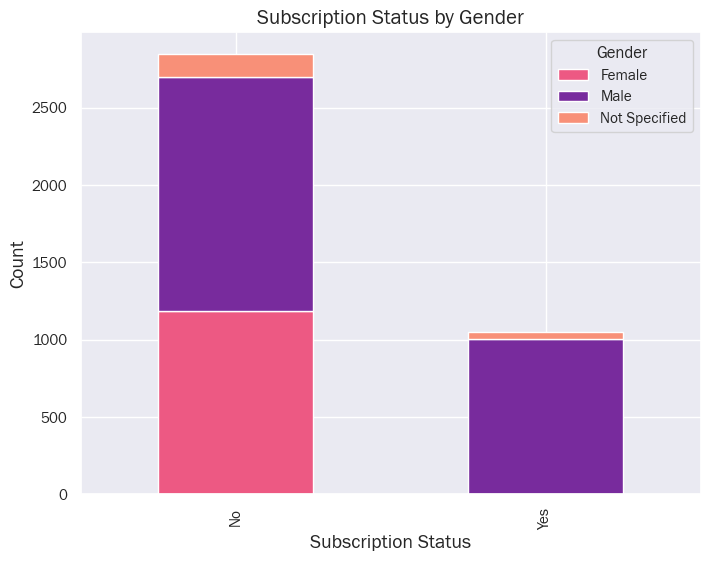

In [168]:
# Plot a stacked bar chart
colors={'Female':'#ed5983', 'Male':'#782b9d', 'Not Specified':'#f89078'}
gender_subscription.plot(kind='bar',
                         stacked=True,
                         figsize=(8, 6),
                         color=colors)
plt.title('Subscription Status by Gender',
          fontname='Franklin Gothic Book',
          fontsize=15)
plt.xlabel('Subscription Status',
           fontname='Franklin Gothic Book',
           fontsize=14)
plt.ylabel('Count',
           fontname='Franklin Gothic Book',
           fontsize=14)
plt.show()



---



#### - What **shipping types do they use**? <a name="shipping-types-do-they-use"></a>

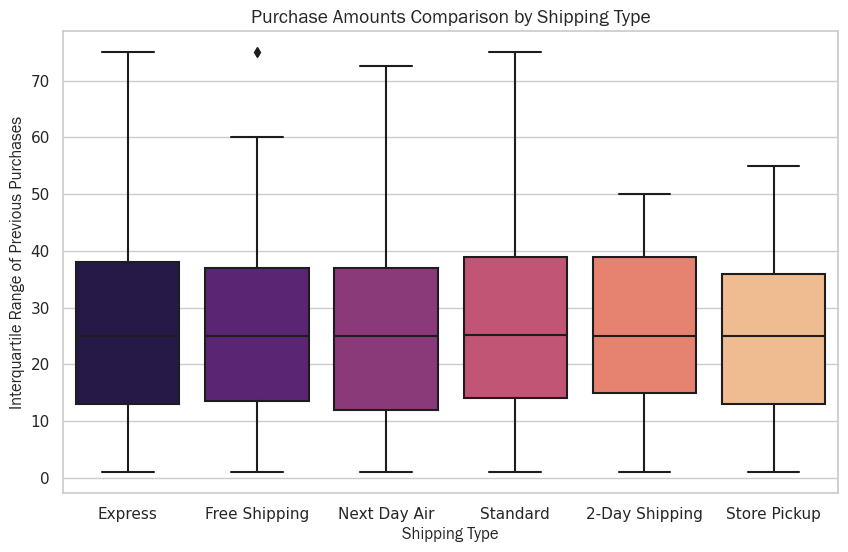

In [169]:
# Set the style
sns.set(style="whitegrid")

# Plotting the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=shopping['Shipping Type'],
            y=shopping['IQR_Previous Purchases'],
            palette="magma")

# Adding title and labels
plt.title('Purchase Amounts Comparison by Shipping Type',
          font='Franklin Gothic Book',
          fontsize=14)
plt.xlabel('Shipping Type',
           font='Franklin Gothic Book',
           fontsize=12)
plt.ylabel('Interquartile Range of Previous Purchases',
           font='Franklin Gothic Book',
           fontsize=12)
plt.show()



---



#### - What is the **correlation** between **numerical columns**? <a name="correlation-numerical-columns"></a>

<ipython-input-170-de6333d56fb6>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

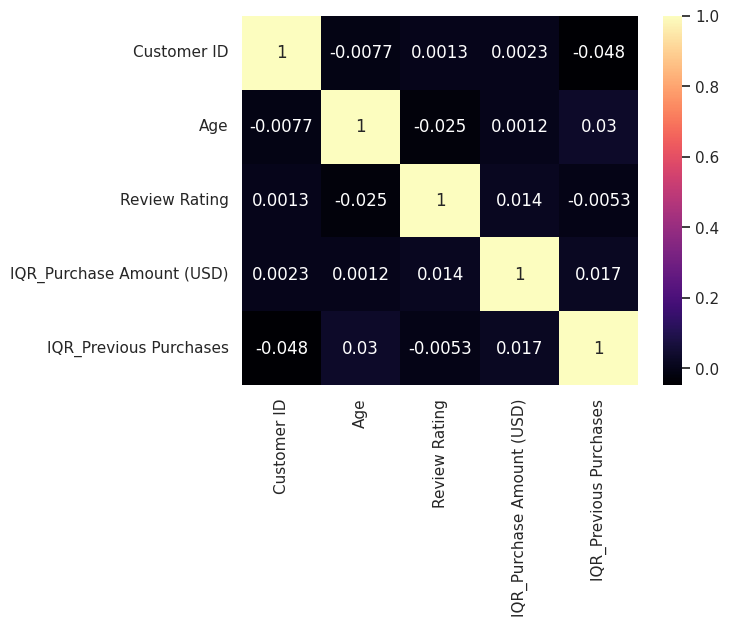

In [170]:
sns.heatmap(shopping.drop(columns=['Combined Score']).corr(),
            cmap='magma',
            annot=True)



---



#### - **Overview** of **relationships** between the selected **variables**. <a name="Overview-relationships-columns"></a>

In [171]:
# Numerical columns
numeric_columns = ['Age', 'Review Rating', 'Frequency of Purchases',
                        'IQR_Purchase Amount (USD)', 'IQR_Previous Purchases']

In [172]:
# Categorical columns
categorical_columns = ['Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season']

In [173]:
# Combine the columns
columns_to_plot = numeric_columns + categorical_columns

In [174]:
# Subset the DataFrame to include only the selected columns
subset_df = shopping[columns_to_plot]

<Figure size 800x800 with 0 Axes>

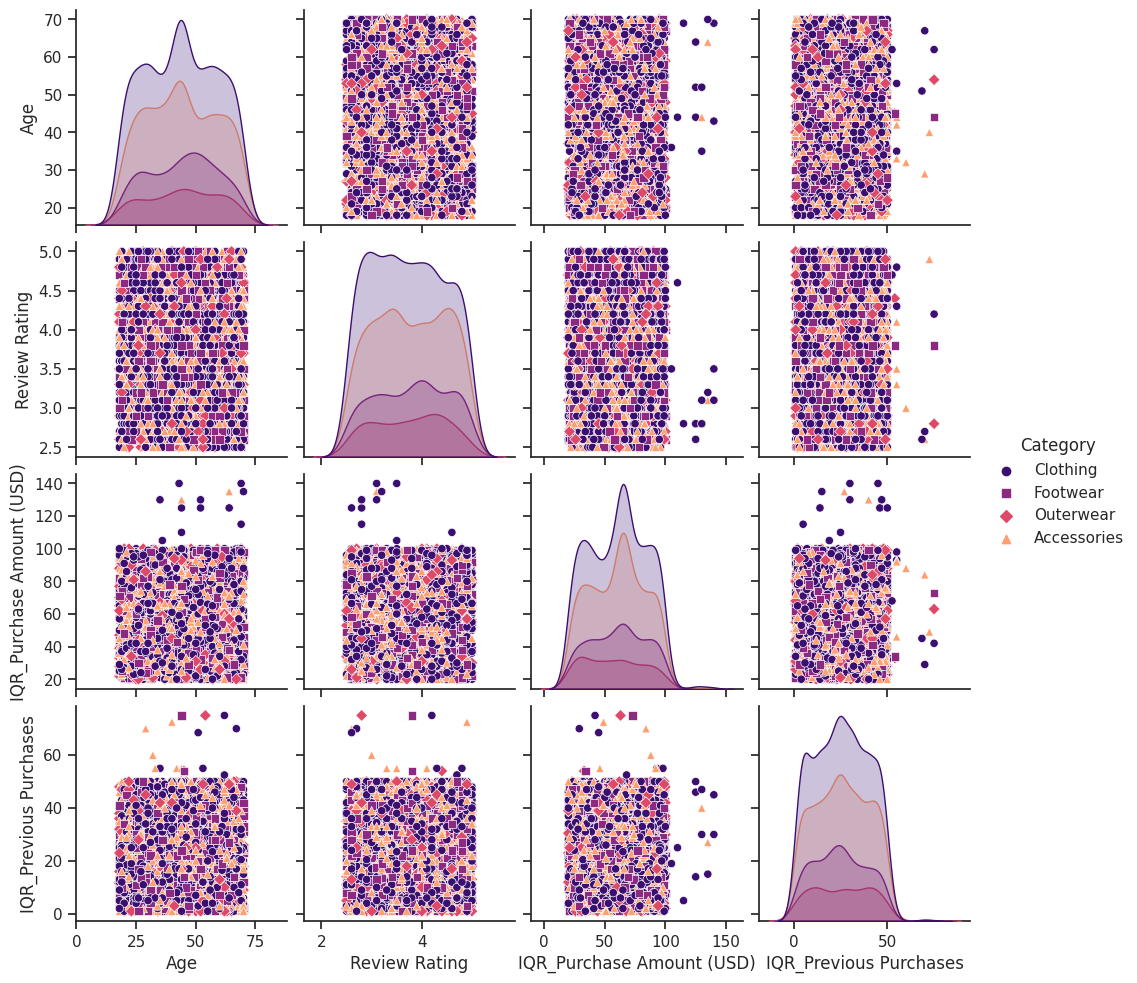

In [175]:
# Pairplot function from Seaborn
plt.figure(figsize=(8, 8))
sns.set(style="ticks")
sns.pairplot(subset_df,
             hue='Category',
             markers=["o", "s", "D","^"],
             palette="magma")
plt.show()



---



### 4.2 **Statistical Summary:** <a name="42-summary"></a>


In [176]:
shopping.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.500000,2925.25,3900.0
Age,3900.0,44.022402,14.832165,18.0,31.00,44.022402,57.00,70.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.700000,4.40,5.0
IQR_Purchase Amount (USD),3900.0,60.299447,23.099762,20.0,40.00,62.000000,79.00,140.0
IQR_Previous Purchases,3900.0,25.468462,14.321785,1.0,13.50,25.000000,37.00,75.0
Combined Score,3900.0,85.767908,27.386930,22.0,66.00,86.000000,106.00,185.0


In [177]:
shopping.describe(include ='O').T

,count,unique,top,freq
Gender,3900,3,Male,2519
Item Purchased,3900,25,Blouse,171
Category,3900,4,Clothing,1737
Location,3900,50,Idaho,287
Size,3900,4,M,1755
Color,3900,25,Olive,177
Season,3900,4,Spring,999
Subscription Status,3900,2,No,2847
Shipping Type,3900,6,Free Shipping,675
Discount Applied,3900,2,No,2223




---



### 4.3 **Time Series** Analysis <a name="43-time-series-analysis"></a>

In [178]:
# Greated functions to help encoding and preprocessing for the dates columns
def encode_dates(dataframe, column):
    dataframe = dataframe.copy()

    dataframe[column] = pd.to_datetime(dataframe[column])

    dataframe[column + '_year'] = dataframe[column].apply(lambda data : data.year)
    dataframe[column + '_month'] = dataframe[column].apply(lambda data : data.month)
    dataframe[column + '_day'] = dataframe[column].apply(lambda data : data.day)

    # dataframe = dataframe.drop(column, axis = 1)

    return dataframe

In [179]:
def preprocess_date(dataframe, date_column='Date'):
    dataframe = dataframe.copy()

    # Extract date features
    dataframe = encode_dates(dataframe, column='Date')

    return dataframe

In [180]:
# Using preprocess date function with date column
shopping = preprocess_date(shopping, date_column='Date')

In [181]:
# Month Count
month_counts = shopping['Date_month'].value_counts().sort_index(); month_counts

1     332
2     302
3     332
4     320
5     331
6     321
7     331
8     331
9     320
10    332
11    320
12    328
Name: Date_month, dtype: int64

In [182]:
# Year Count
year_counts = shopping['Date_year'].value_counts().sort_index(); year_counts

2020    1304
2021    1299
2022    1297
Name: Date_year, dtype: int64

In [183]:
# Setting 'date' as the index
shopping.set_index('Date', inplace=True)

In [184]:
# Resampling the data to get counts by month
month_counts = shopping.resample('M').size().reset_index()
month_counts.columns = ['Date', 'Count']

In [185]:
# Creating a time series plot
fig = px.line(month_counts,
               x='Date',
               y='Count',
               markers=True,
               title='Monthly shopping Over Time')

# Customizing the appearance
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Count')
fig.update_traces(marker=dict(size=5), line=dict(color='blue'))
fig.show()

#### **Seasonal Decomposition of Monthly Shopping**

In [186]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [187]:
# Decomposing the time series
decomposition = seasonal_decompose(shopping.resample('M').size(), model='additive')

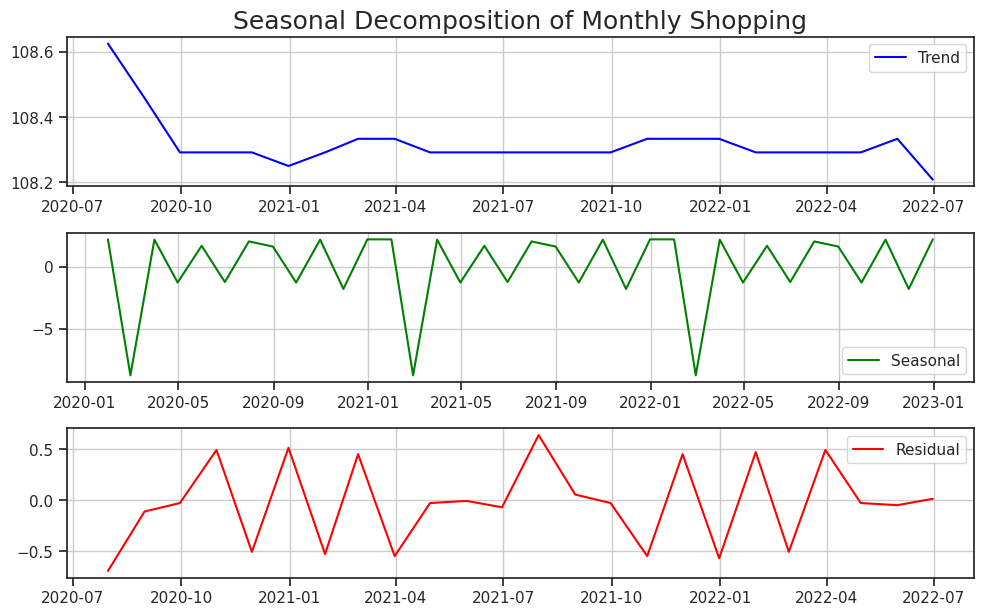

In [188]:
# Plotting the decomposition
plt.figure(figsize=(10, 8))

# Trend
plt.subplot(4, 1, 1)
plt.plot(decomposition.trend,
         label='Trend',
         color='blue')
plt.legend()
plt.grid(True)
plt.title('Seasonal Decomposition of Monthly Shopping',
          fontsize=18)

# Seasonal
plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal,
         label='Seasonal',
         color='green')
plt.legend()
plt.grid(True)

# Residual
plt.subplot(4, 1, 3)
plt.plot(decomposition.resid,
         label='Residual',
         color='red')
plt.legend()
plt.grid(True)

# Adjusting layout to prevent clipping of titles
plt.tight_layout()
plt.show()



---



##**Dashboard**

#### [DASHBOARD](https://shopping-dashboard.streamlit.app/)



---



##5. **Insights and Recommandations** <a name="5-insights-recommandations"></a>

Based on exploratory data analysis findings it's recommended to do campaigns for **middle aged men** who reside in **Idaho**, and time them to **February** as sales reach their lowest point.



---



## 6. **Conclusion** <a name="6-conclusion"></a>

In this notebook, we have presented key insights from the Consumer Behavior and Shopping Habits dataset. We observed trends in Purchase Amount, explored Previous Purchase Amount, and analyzed the distribution of Purchase Amount by Location, Category and Item Purchased.



---

